In [1]:
import numpy as np
import pickle
from scipy.stats import skew
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Load data

In [2]:
X_list, Y, Yaudio = pickle.load(open('../data/lda_data_8.pickle','rb'))
X = np.concatenate(X_list, axis=1)
print X.shape

(8200, 381)


## Pairwise distances

In [3]:
D = pairwise_distances(X, metric='mahalanobis')

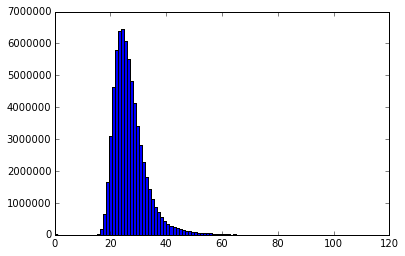

In [6]:
plt.hist(D.ravel(), bins=100);

## n-occurrence and stats

In [7]:
def n_occurrence_from_D(D, k=10, n_items=None):
    if n_items is None:
        n_items = len(D)
    sort_idx = np.argsort(D, axis=1)
    D_k = sort_idx[:, 1:(k+1)]  # nearest neighbour is the item itself
    N_k = np.bincount(D_k.astype(int).ravel(), minlength=n_items)
    return N_k

In [8]:
# k = average number of samples per country
uniq_countries, uniq_counts = np.unique(Y, return_counts=True)
k = np.int(np.round(np.mean(uniq_counts)))
print k

60


In [9]:
N_k = n_occurrence_from_D(D, k=k)

print 'hubness', skew(N_k)
print 'median', np.median(N_k)
print 'std', np.std(N_k)
print 'hubs', len(np.where(N_k>1000)[0]), len(np.where(N_k>1000)[0]) / float(len(N_k))
print 'orphans', len(np.where(N_k==0)[0]), len(np.where(N_k==0)[0]) / float(len(N_k))

hubness 10.5914304167
median 1.0
std 348.006117132
hubs 129 0.0157317073171
orphans 3332 0.406341463415


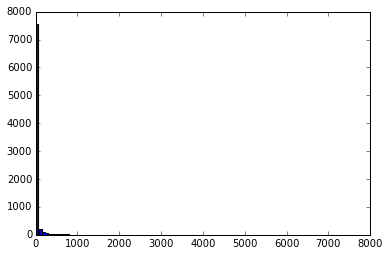

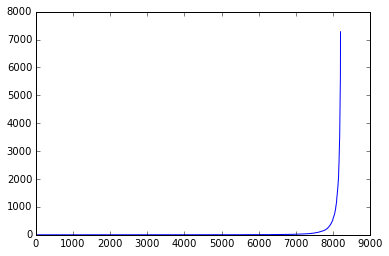

In [10]:
plt.figure()
plt.hist(N_k, bins=100);

plt.figure()
plt.plot(np.sort(N_k))

## Large hubs

129


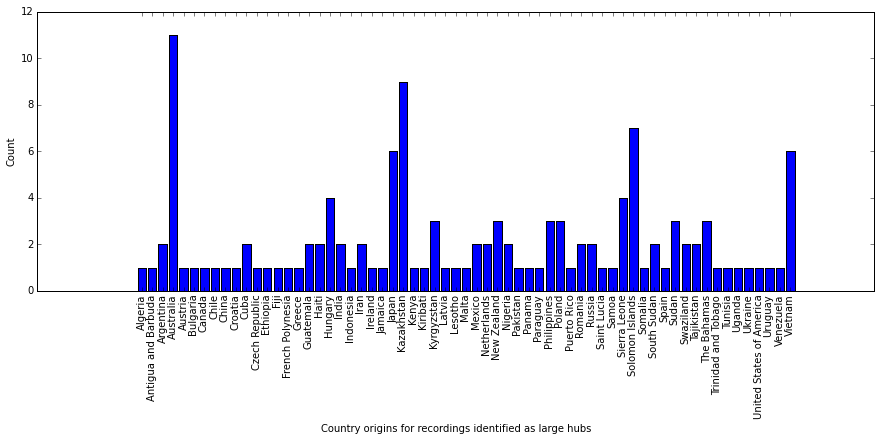

In [15]:
large_hubs_idx = np.where(N_k>1000)[0]
print len(large_hubs_idx)
labs, counts = np.unique(Y[large_hubs_idx], return_counts=True)

plt.figure(figsize=(15, 5))
plt.bar(range(len(labs)), counts, align='center');
plt.xticks(range(len(labs)), labs, rotation=90);
plt.ylabel('Count')
plt.xlabel('Country origins for recordings identified as large hubs')